In [1]:
import tensorflow as tf

In [2]:
tf.enable_eager_execution()

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000122352150F0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001223A9F06D8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001223D62D240>)

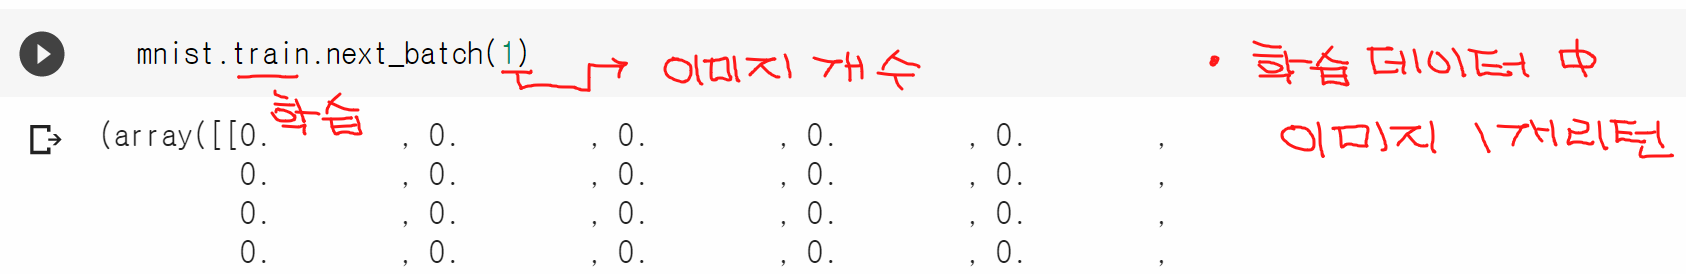

In [6]:
image1 = mnist.train.next_batch(1)

In [7]:
image1[1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [8]:
import matplotlib.pyplot as plt

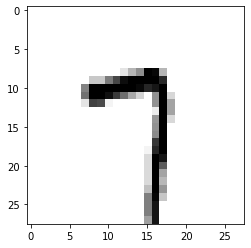

In [9]:
plt.imshow(image1[0].reshape((28,28)),cmap=plt.cm.gray_r)

In [10]:
X, y = mnist.train.next_batch(1)

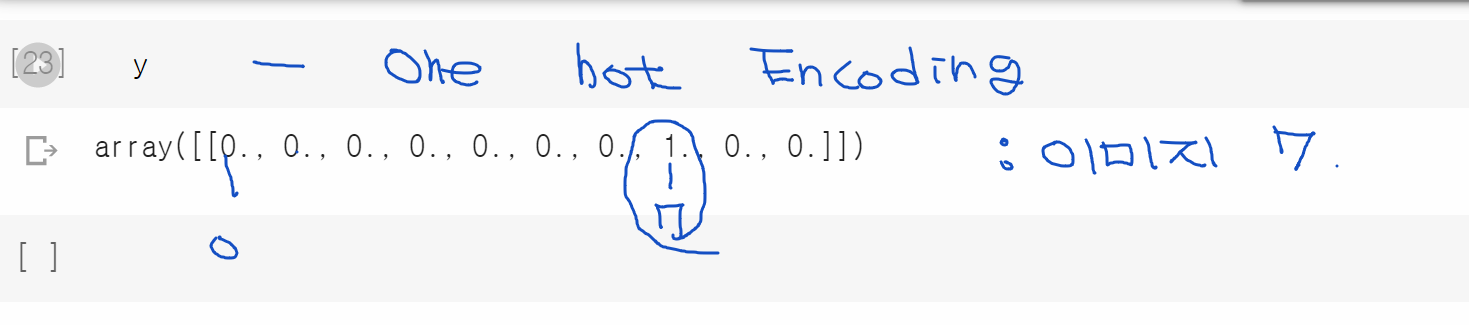

In [11]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

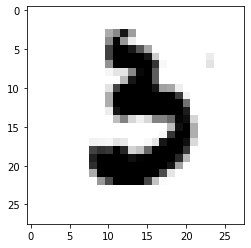

In [12]:
plt.imshow(X.reshape((28,28)), cmap=plt.cm.gray_r)

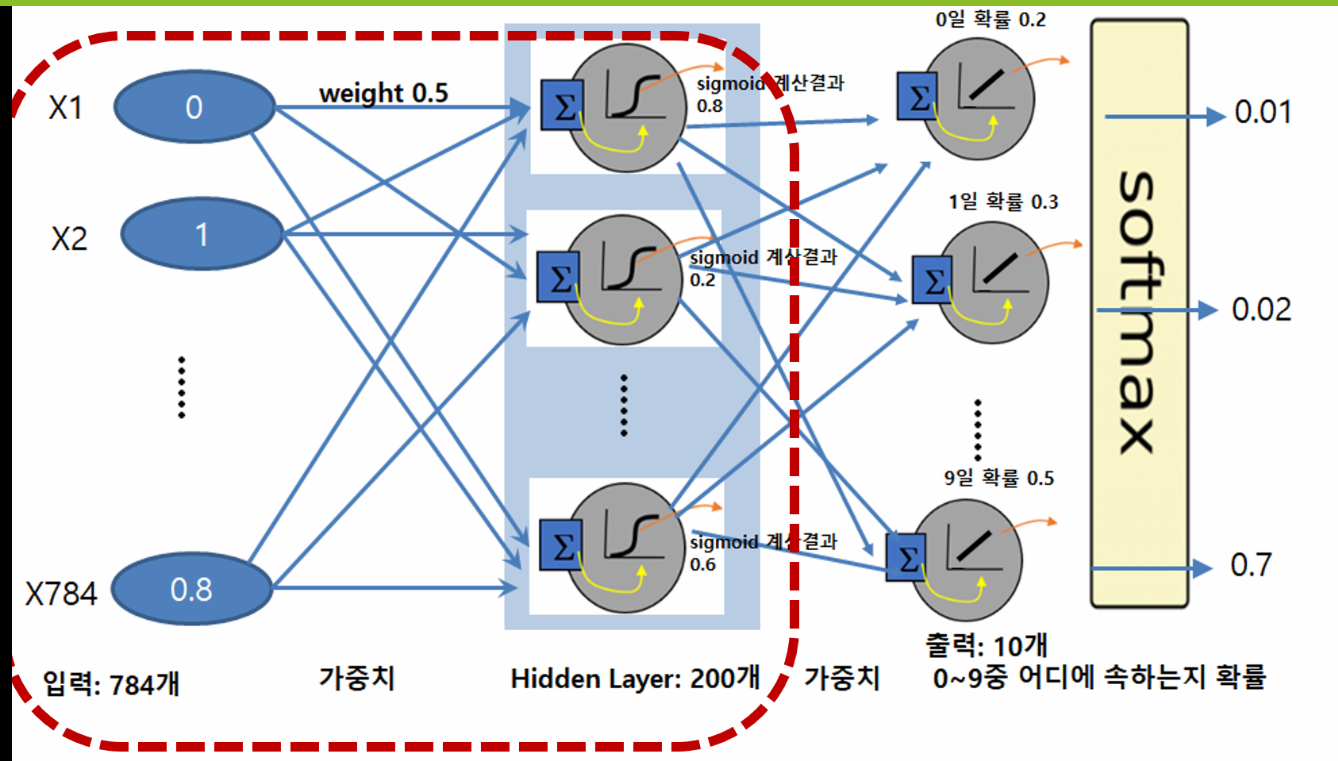

In [13]:
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [14]:
w0 = tf.Variable(initializer([784,200]))

In [15]:
b0 = tf.Variable(initializer([200]))

In [16]:
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)

In [17]:
hypothesis0

<tf.Tensor: id=32, shape=(1, 200), dtype=float32, numpy=
array([[0.5365458 , 0.3330156 , 0.5740568 , 0.38398686, 0.7019732 ,
        0.45418048, 0.47594413, 0.45971766, 0.29775763, 0.5853478 ,
        0.7150114 , 0.43253705, 0.36413553, 0.46256167, 0.34269303,
        0.23867801, 0.33794618, 0.45335498, 0.377474  , 0.6993078 ,
        0.45721212, 0.45841742, 0.45289955, 0.26357672, 0.5154348 ,
        0.6423693 , 0.29175878, 0.47637436, 0.26627228, 0.3367573 ,
        0.6026352 , 0.28644753, 0.67429453, 0.6329744 , 0.60937387,
        0.5174662 , 0.77298033, 0.4555502 , 0.5901339 , 0.6564404 ,
        0.5172314 , 0.39981356, 0.38511172, 0.3216093 , 0.6579998 ,
        0.41679424, 0.53536195, 0.7411153 , 0.38834155, 0.4016428 ,
        0.6632081 , 0.4879682 , 0.6055182 , 0.3679831 , 0.5487978 ,
        0.44027597, 0.48577496, 0.20976892, 0.6705231 , 0.3908334 ,
        0.57826513, 0.42484626, 0.37561056, 0.5860363 , 0.43513143,
        0.64251065, 0.43356332, 0.5720347 , 0.4611829 , 0.3

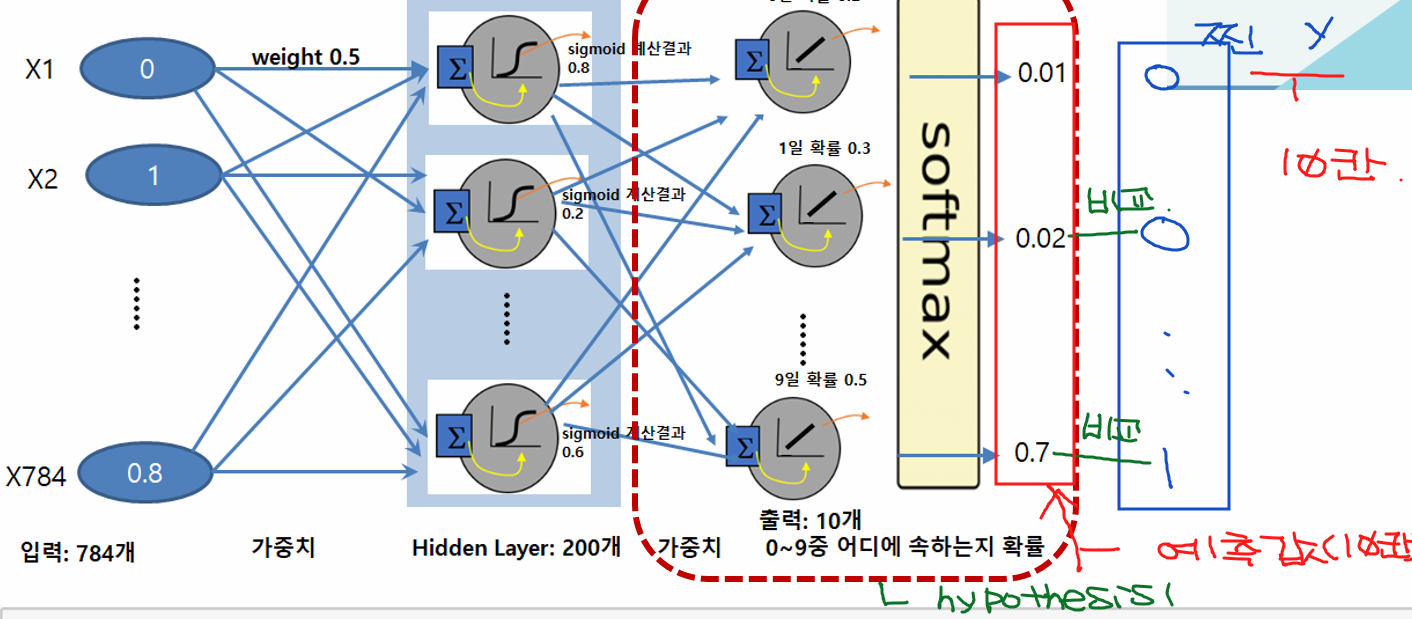

In [18]:
hypothesis0.shape

TensorShape([Dimension(1), Dimension(200)])

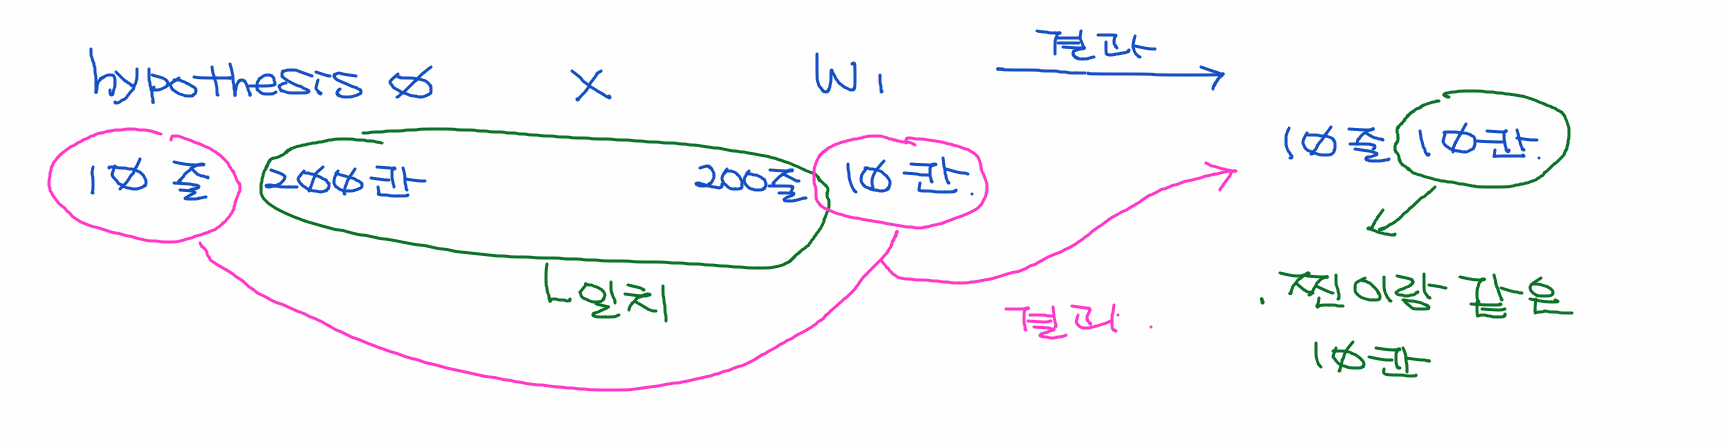

In [19]:
w1 = tf.Variable(initializer([200,10]))

In [20]:
b1 = tf.Variable(initializer([10]))

In [21]:
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)

In [22]:
hypothesis1

<tf.Tensor: id=63, shape=(1, 10), dtype=float32, numpy=
array([[0.06624035, 0.12248771, 0.16830194, 0.04699961, 0.04531944,
        0.16517675, 0.14523515, 0.10648958, 0.05458204, 0.07916735]],
      dtype=float32)>

In [23]:
mnist.train.num_examples

55000

In [24]:
optimizer = tf.train.AdamOptimizer(0.001)

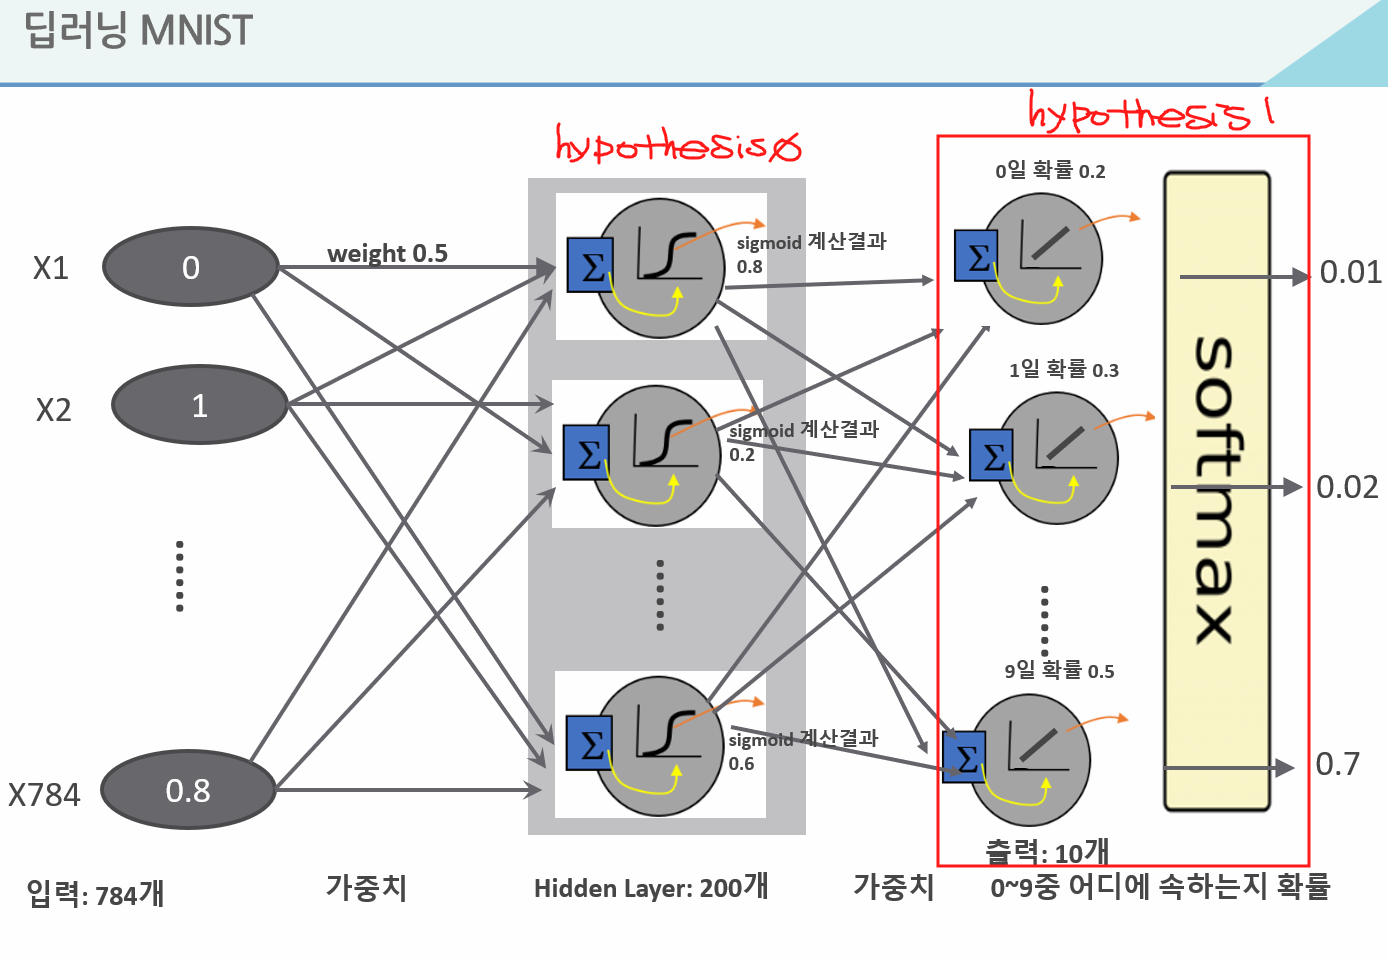

In [25]:
X, y = mnist.train.next_batch(100)
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)

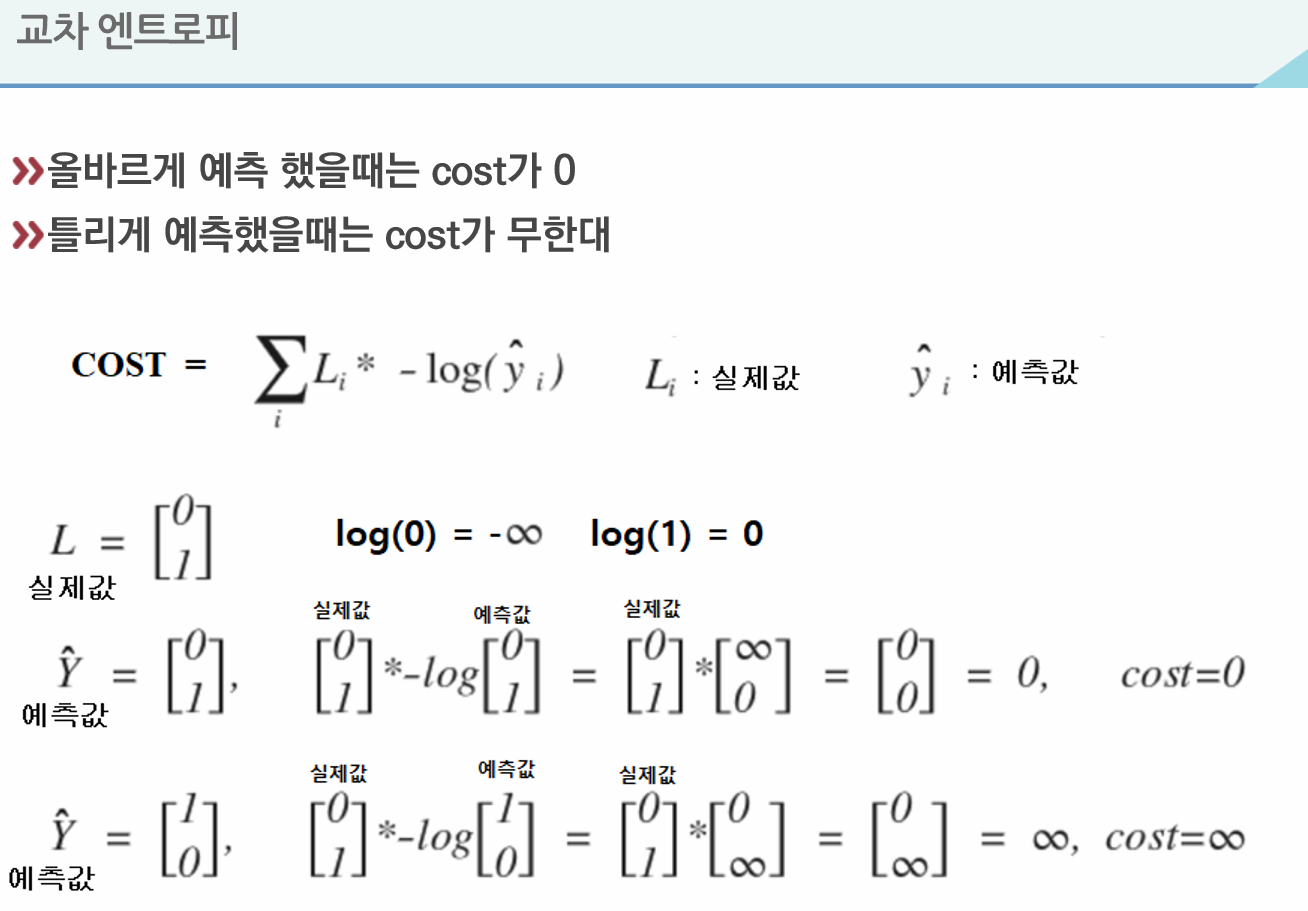

In [26]:
X, y = mnist.train.next_batch(100)
hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)
cost = -tf.reduce_mean(y*tf.log(hypothesis1))
print("cost =" , cost)

cost = tf.Tensor(0.24034086, shape=(), dtype=float32)


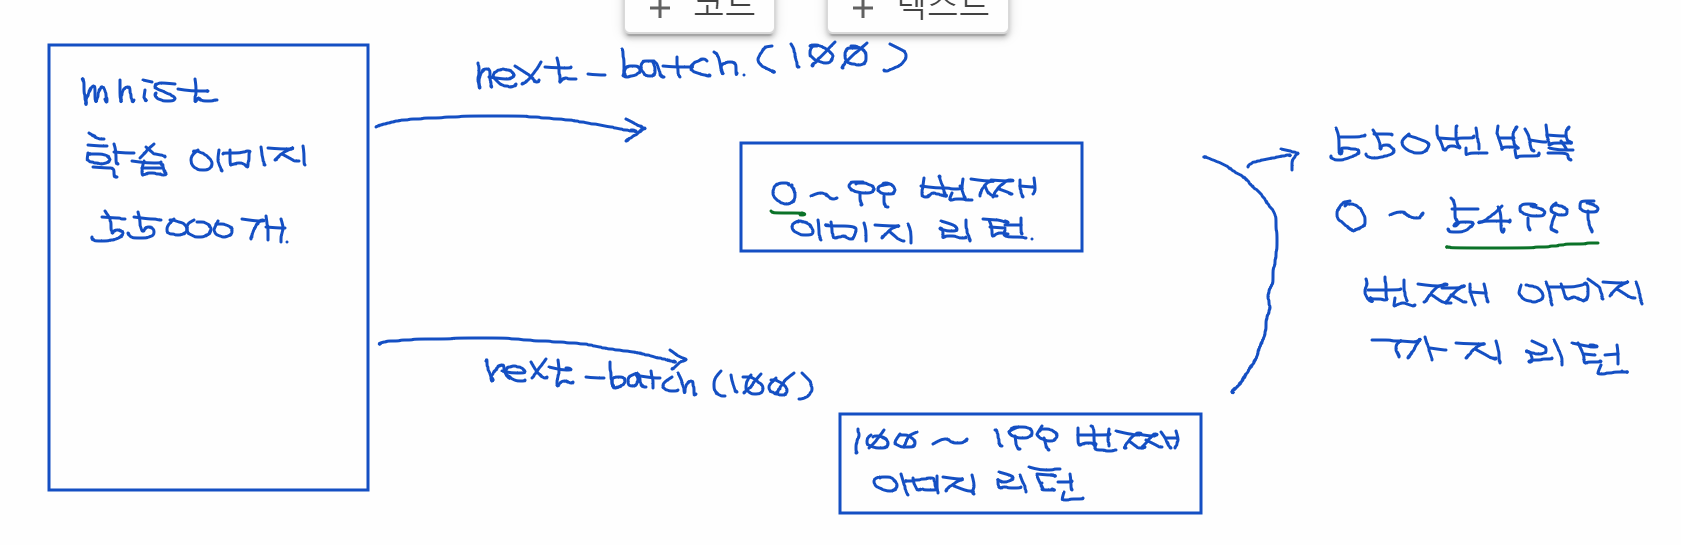

In [27]:
for step in range(10):
    print("="*100)
    print("step = ", step)
    print("="*100)
    for i in range(550):
        X, y = mnist.train.next_batch(100)

        with tf.GradientTape() as tape:
            hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)
            hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)
            cost = -tf.reduce_mean(y*tf.log(hypothesis1))
            grads = tape.gradient(cost,[w0,w1,b0,b1])
            optimizer.apply_gradients(grads_and_vars=zip(grads,[w0,w1,b0,b1]))
            
            if i % 50 == 0:
                print("="*100)
                print("i = ", i)    
                print("cost =" , cost)
                print("="*100)

step =  0
i =  0
cost = tf.Tensor(0.23597784, shape=(), dtype=float32)
i =  50
cost = tf.Tensor(0.085103236, shape=(), dtype=float32)
i =  100
cost = tf.Tensor(0.066435024, shape=(), dtype=float32)
i =  150
cost = tf.Tensor(0.055369083, shape=(), dtype=float32)
i =  200
cost = tf.Tensor(0.04969618, shape=(), dtype=float32)
i =  250
cost = tf.Tensor(0.061425738, shape=(), dtype=float32)
i =  300
cost = tf.Tensor(0.034115706, shape=(), dtype=float32)
i =  350
cost = tf.Tensor(0.039969515, shape=(), dtype=float32)
i =  400
cost = tf.Tensor(0.01892308, shape=(), dtype=float32)
i =  450
cost = tf.Tensor(0.0381072, shape=(), dtype=float32)
i =  500
cost = tf.Tensor(0.029543908, shape=(), dtype=float32)
step =  1
i =  0
cost = tf.Tensor(0.029608712, shape=(), dtype=float32)
i =  50
cost = tf.Tensor(0.02320454, shape=(), dtype=float32)
i =  100
cost = tf.Tensor(0.02422554, shape=(), dtype=float32)
i =  150
cost = tf.Tensor(0.0114543745, shape=(), dtype=float32)
i =  200
cost = tf.Tensor(0.0083

In [28]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
test_images = mnist.test.images[99:100]

In [30]:
hypothesis0 = tf.sigmoid(tf.matmul(test_images,w0) + b0)

In [31]:
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1) + b1)

In [32]:
hypothesis1

<tf.Tensor: id=379689, shape=(1, 10), dtype=float32, numpy=
array([[7.6129788e-07, 3.5887421e-08, 9.3874669e-06, 8.7394110e-05,
        3.7159908e-04, 2.9433356e-06, 1.2220991e-07, 5.2258192e-04,
        4.5548750e-05, 9.9895966e-01]], dtype=float32)>

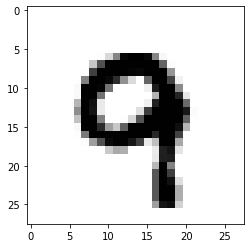

In [33]:
plt.imshow(test_images.reshape((28,28)),cmap=plt.cm.gray_r)

In [34]:
tf.arg_max(hypothesis1, 1)

<tf.Tensor: id=379691, shape=(1,), dtype=int64, numpy=array([9], dtype=int64)>

In [35]:
print(tf.arg_max(hypothesis1, 1))

tf.Tensor([9], shape=(1,), dtype=int64)
